In [ ]:
# Point to get across
# What is K-Means
# K Cluster Selection - Elbow Method
# K-Means Use case
# Show how the algo works --> Show how to scale features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
dataFrame = pd.read_csv('../data/price_zone.csv')
priceZone = dataFrame.copy()

In [32]:
priceZone.head()

store  avg_weekly_sales  price_elasticity  median_household_income  \
0  s1001             12293             -3.25                   113848   
1  s1002             24606             -2.04                    67687   
2  s1003             66042             -3.68                   110448   
3  s1004             64912             -2.48                    39508   
4  s1005            152239             -1.39                    73039   

   avg_weekly_txn  avg_unit_retail  
0      585.380952             8.74  
1      984.240000            14.75  
2     7338.000000            11.55  
3     2704.666667             5.49  
4    15223.900000             8.93

In [33]:
priceZone.describe()

avg_weekly_sales  price_elasticity  median_household_income  \
count        999.000000        999.000000               999.000000   
mean      104166.528529         -2.623994             87370.028028   
std        55788.861500          0.799776             35578.135917   
min        10290.000000         -4.000000             25110.000000   
25%        54387.500000         -3.300000             56908.500000   
50%       104843.000000         -2.620000             85138.000000   
75%       152671.500000         -1.960000            117500.000000   
max       199970.000000         -1.210000            149965.000000   

       avg_weekly_txn  avg_unit_retail  
count      999.000000       999.000000  
mean      8365.742307         8.921802  
std       6702.604205         3.520830  
min        414.720000         3.000000  
25%       3668.365080         5.710000  
50%       6782.380952         8.990000  
75%      10651.753470        11.985000  
max      39291.200000        14.990000

In [17]:
# this retail chain can only manage up to 20 price zones

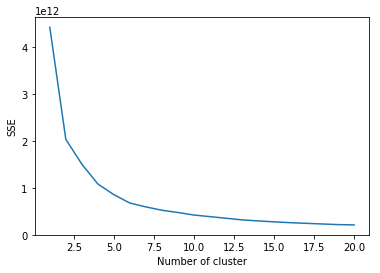

In [35]:
# Explain SSE
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone.drop(columns=['store']))
    priceZone["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [36]:
print(sse)
# for k in range(1,11):
#     print(str(k) + ': ' + str(sse[k] - sse[k+1]))

{1: 4414279487443.367, 2: 2029088130470.8276, 3: 1500089091227.231, 4: 1079048735714.5193, 5: 851770528949.3263, 6: 672818715589.5403, 7: 591104363707.2126, 8: 519859100476.6699, 9: 471855524466.0669, 10: 418143988340.2174, 11: 383852611331.4538, 12: 349637785548.103, 13: 315558965705.203, 14: 293124690021.1129, 15: 273527582202.42593, 16: 255468419284.8553, 17: 241566032716.381, 18: 227931657711.8158, 19: 214474475491.4139, 20: 207819283108.5882}


In [39]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone.drop(columns=['store']))
priceZone["clusters"] = kmeans.labels_
priceZone.groupby(by=['clusters']).mean()

avg_weekly_sales  price_elasticity  median_household_income  \
clusters                                                                
0            119900.527778         -2.646250             42425.319444   
1             28192.373494         -2.681446             81252.698795   
2            148412.539474         -2.645395            121560.092105   
3             65474.594203         -2.741014            129550.666667   
4            178435.689189         -2.673378             46391.513514   
5             79946.717949         -2.510000             48406.935897   
6             38086.558824         -2.777941             43512.235294   
7            109916.557377         -2.544918            132372.557377   
8             26055.028571         -2.628571            127662.700000   
9            184541.288136         -2.698475            132766.186441   
10           144791.883117         -2.470649             68718.727273   
11            65231.121951         -2.600732             89232.573171   
12           110544.169492         -2.481186             90493.220339   
13           180644.436620         -2.637324             89396.056338   

          avg_weekly_txn  avg_unit_retail  
clusters                                   
0            8683.050819         8.422639  
1            2289.329802         9.181446  
2           10788.987068         8.788816  
3            5689.051721         8.760435  
4           14359.199905         8.837973  
5            7074.040631         9.144744  
6            2912.532776         9.266324  
7            8306.247435         8.476230  
8            1949.280179         9.390429  
9           16619.485691         9.000847  
10          11832.591926         8.693636  
11           5467.019825         8.892195  
12           8554.365862         8.764746  
13          14499.628221         9.203380

In [88]:
# radar plot

## Scale the data

In [45]:
priceZone_normalized = dataFrame.copy()

priceZone_normalized_store = priceZone_normalized['store']
priceZone_normalized.drop(columns=['store'], inplace=True)

priceZone_normalized = (priceZone_normalized - priceZone_normalized.mean())/priceZone_normalized.std()

priceZone_normalized['store'] = priceZone_normalized_store
priceZone_normalized.head()

avg_weekly_sales  price_elasticity  median_household_income  \
0         -1.646808         -0.782727                 0.744220   
1         -1.426101          0.730197                -0.553234   
2         -0.683372         -1.320377                 0.648656   
3         -0.703627          0.180043                -1.345265   
4          0.861686          1.542925                -0.402804   

   avg_weekly_txn  avg_unit_retail  store  
0       -1.160797        -0.051636  s1001  
1       -1.101289         1.655348  s1002  
2       -0.153335         0.746471  s1003  
3       -0.844608        -0.974714  s1004  
4        1.023208         0.002328  s1005

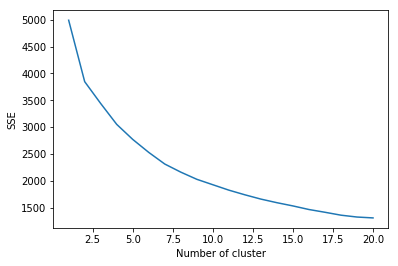

In [46]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone_normalized.drop(columns=['store']))
    priceZone_normalized["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
print(sse)

{1: 4989.999999999996, 2: 3845.634167555295, 3: 3438.219166512359, 4: 3049.4331806501878, 5: 2769.260642677973, 6: 2527.0583277584947, 7: 2310.3829273831816, 8: 2159.482075772442, 9: 2025.9860825255992, 10: 1924.780667645679, 11: 1824.0366247999568, 12: 1737.1567075933547, 13: 1657.1919302389072, 14: 1590.1176062005025, 15: 1529.8991861368738, 16: 1463.013504169041, 17: 1411.7279510876806, 18: 1357.445781241278, 19: 1322.9896347852637, 20: 1306.5186795481936}


In [53]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone_normalized.drop(columns=['store']))
priceZone_normalized["clusters"] = kmeans.labels_
priceZone_normalized.groupby(by=['clusters']).mean()

avg_weekly_sales  price_elasticity  median_household_income  \
clusters                                                                
0                 0.917236          0.109464                -0.858578   
1                -0.922125          0.900394                -0.535136   
2                -0.557442          0.965680                -0.898755   
3                 0.642105         -1.117508                 0.688032   
4                -0.976268         -0.835595                 0.813680   
5                 0.819836          0.407908                 1.082064   
6                 0.776338         -0.368027                -1.132079   
7                -0.770646          0.802477                 0.750678   
8                 1.124700          0.599133                 0.121202   
9                 0.954117          1.049929                -0.714306   
10               -0.846373          0.727777                 1.079117   
11               -0.572282         -1.006383                -0.756063   
12               -0.845045         -0.823034                -0.896739   
13                0.907385          0.688358                 1.094186   

          avg_weekly_txn  avg_unit_retail  
clusters                                   
0               0.447115        -0.995567  
1              -0.634977         0.937064  
2              -0.503128        -0.940717  
3               0.343907         0.345003  
4              -0.750436        -0.060620  
5               0.290175        -0.824279  
6               0.484751         0.633177  
7              -0.563792        -1.038794  
8               2.827861        -0.358940  
9               0.408708         0.890570  
10             -0.646698         0.888483  
11             -0.523571        -0.923093  
12             -0.631931         0.915353  
13              0.203573         0.824086

In [60]:
# priceZone.drop(columns=['clusters'], inplace=True)
priceZone = pd.merge(priceZone, priceZone_normalized[["store", "clusters"]], on=['store'])
priceZone.head()

store  avg_weekly_sales  price_elasticity  median_household_income  \
0  s1001             12293             -3.25                   113848   
1  s1002             24606             -2.04                    67687   
2  s1003             66042             -3.68                   110448   
3  s1004             64912             -2.48                    39508   
4  s1005            152239             -1.39                    73039   

   avg_weekly_txn  avg_unit_retail  clusters  
0      585.380952             8.74         4  
1      984.240000            14.75         1  
2     7338.000000            11.55         3  
3     2704.666667             5.49         2  
4    15223.900000             8.93         9

In [61]:
priceZone.groupby(by=['clusters']).mean()

avg_weekly_sales  price_elasticity  median_household_income  \
clusters                                                                
0            155338.105263         -2.536447             56823.421053   
1             52722.238806         -1.903881             68330.880597   
2             73067.500000         -1.851667             55393.984848   
3            139988.808333         -3.517750            111848.916667   
4             49701.663043         -3.292283            116319.239130   
5            149904.258621         -2.297759            125867.862069   
6            147477.569444         -2.918333             47092.777778   
7             61173.082192         -1.982192            114077.739726   
8            166912.285714         -2.144821             91682.178571   
9            157395.632653         -1.784286             61956.367347   
10            56948.338710         -2.041935            125762.983871   
11            72239.562500         -3.428875             60470.700000   
12            57022.434211         -3.282237             55465.736842   
13           154788.519231         -2.073462            126299.115385   

          avg_weekly_txn  avg_unit_retail  
clusters                                   
0           11362.574266         5.416579  
1            4109.745480        12.221045  
2            4993.473377         5.609697  
3           10670.815934        10.136500  
4            3335.866743         8.708370  
5           10310.671439         6.019655  
6           11614.837473        11.151111  
7            4586.869344         5.264384  
8           27319.774263         7.658036  
9           11105.152574        12.057347  
10           4031.179894        12.050000  
11           4856.451586         5.671750  
12           4130.162145        12.144605  
13           9730.210313        11.823269

In [ ]:
# maybe add radar graph??

In [16]:
# Export Preped Data to file
outputDF.to_csv('../data/store_cluster.csv', index=False)